In [3]:
import joblib
model=joblib.load('/home/pavit21178/Nalin_OFF/Default/Models_44/LGBM_strat.joblib')

In [4]:
import joblib
import pickle

with open('/home/pavit21178/Nalin_OFF/Default/Models_44/LGBM_strat.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model has been converted and saved as RF_strat.pkl")


Model has been converted and saved as RF_strat.pkl


In [1]:
import cudf

data=cudf.read_csv("/home/pavit21178/Nalin_OFF/Data/8_Nutrients.csv",index_col=0)
# keep only data w 1,2,3,4 in the novaclass column
data = data[data['novaclass'].isin([1,2,3,4])]


data=data.dropna()

def sanitize_feature_names(df):
    df.columns = [col.replace('"', '').replace("'", '').replace("\\", '') for col in df.columns]
    df.columns = [col.replace(',', '') for col in df.columns]
    return df

data=sanitize_feature_names(data)


# %%
# use random forest to predict the NOVA group
from cuml.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from cuml.metrics import accuracy_score

X = data.drop('novaclass', axis=1)
y=data['novaclass']



# %%
from cuml.preprocessing import SimpleImputer
import cupy as cp
imp_mean = SimpleImputer(missing_values=cp.nan, strategy='mean')


# %%
from cuml.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [2]:
import joblib
model=joblib.load('/home/pavit21178/Nalin_OFF/Default/Models_8/LGBM_strat.joblib')

In [3]:
import shap
import matplotlib.pyplot as plt

# Convert CUDA arrays to pandas/numpy if needed
X_test_pd = X.to_pandas()

In [4]:
# Calculate SHAP values using the existing model
explainer = shap.TreeExplainer(model)

In [5]:
shap_values = explainer.shap_values(X_test_pd)

In [6]:
print(f"Shape of shap_values: {[sv.shape for sv in shap_values]}")
print(f"Shape of X_test_pd: {X_test_pd.shape}")

Shape of shap_values: [(8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (

In [7]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Convert CUDA Series to numpy array for easier handling
y_test_np = y.to_numpy()
X_test_pd = X_test_pd  # Get the same subset used for SHAP values
y_test_subset = y_test_np    # Get corresponding labels

# Create indices for each NOVA class
class_indices = {
    1: np.where(y_test_subset == 1)[0],
    2: np.where(y_test_subset == 2)[0],
    3: np.where(y_test_subset == 3)[0],
    4: np.where(y_test_subset == 4)[0]
}

# Print class distribution
for nova_class, indices in class_indices.items():
    print(f"NOVA Class {nova_class}: {len(indices)} samples")

# Reshape SHAP values by NOVA class
reshaped_shap_values = []
for class_idx in range(4):  # 4 NOVA classes
    # Get indices for current class
    current_class_indices = class_indices[class_idx + 1]
    
    # Initialize array for this class
    class_shap = np.zeros((len(current_class_indices), X_test_pd.shape[1]))
    
    # Fill in SHAP values for samples belonging to this class
    for i, idx in enumerate(current_class_indices):
        if idx < len(shap_values):
            class_shap[i] = shap_values[idx][:, class_idx]
    
    reshaped_shap_values.append(class_shap)

# Print shapes to verify
for i, shap_vals in enumerate(reshaped_shap_values):
    print(f"NOVA Class {i+1} SHAP values shape: {shap_vals.shape}")

NOVA Class 1: 56139 samples
NOVA Class 2: 10052 samples
NOVA Class 3: 101414 samples
NOVA Class 4: 310217 samples
NOVA Class 1 SHAP values shape: (56139, 8)
NOVA Class 2 SHAP values shape: (10052, 8)
NOVA Class 3 SHAP values shape: (101414, 8)
NOVA Class 4 SHAP values shape: (310217, 8)


/tmp/ipykernel_3854578/2011123479.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


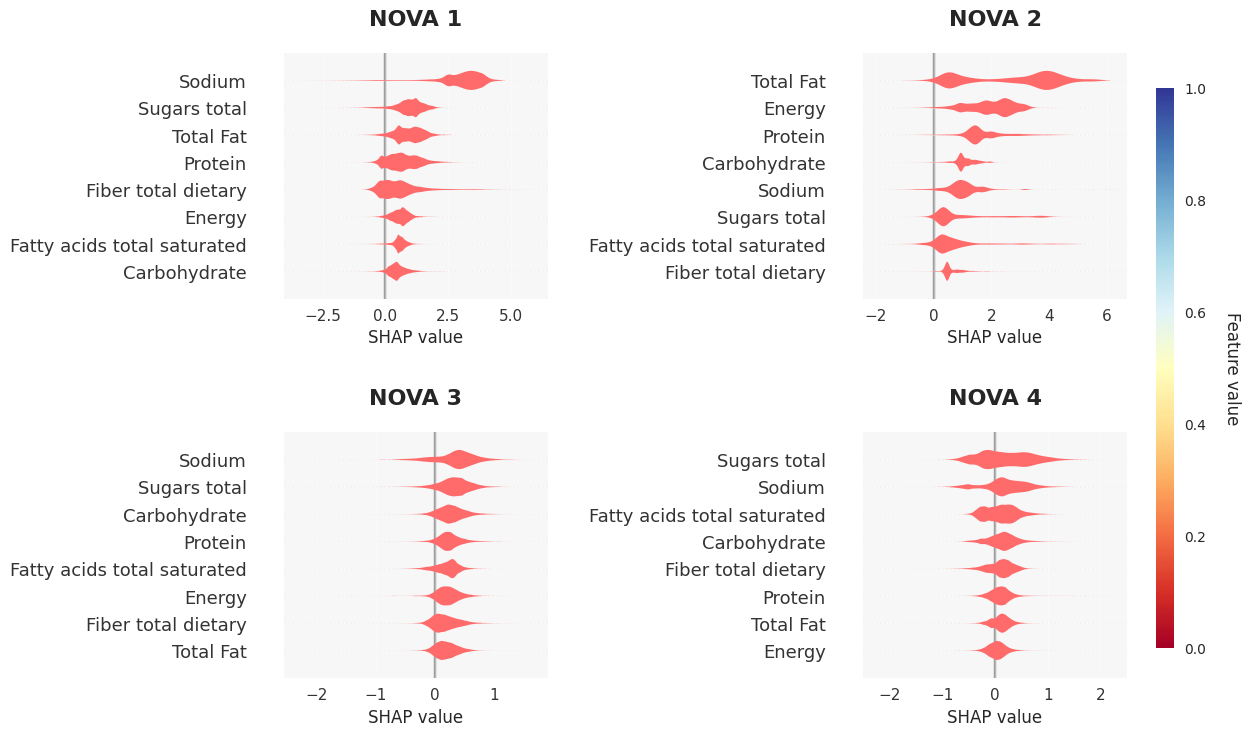

In [8]:
# Set style and figure parameters
plt.style.use('seaborn')
plt.figure(figsize=(30, 30), facecolor='white')

# Custom color palette
custom_colors = ['#FF6B6B', '#4ECDC4']  # Warm pink and cool teal
background_color = '#F7F7F7'

# Create subplots with consistent styling
for idx in range(4):
    plt.subplot(2, 2, idx+1)
    plt.subplots_adjust(right=0.9) 
    # Create summary plot for each class
    shap.summary_plot(
        reshaped_shap_values[idx],
        plot_type="violin",
        show=False,
        color=custom_colors,
        max_display=10,  # Reduced for clarity
        feature_names=X_test_pd.columns,
        plot_size=(12, 8)
    )
    
    # Enhanced title and labels
    plt.title(f"NOVA {idx + 1}", 
             fontsize=16, 
             pad=20, 
             fontweight='bold', 
             fontfamily='sans-serif')
    
    plt.xlabel("SHAP value", 
              fontsize=12, 
              fontfamily='sans-serif')
    
    # Customize grid and spines
    plt.grid(True, alpha=0.3)
    for spine in plt.gca().spines.values():
        spine.set_linewidth(0.5)
    
    # Set background color
    plt.gca().set_facecolor(background_color)

# Adjust layout
plt.tight_layout(pad=3.0)

# Enhanced colorbar
cbar_ax = plt.gcf().add_axes([0.99, 0.15, 0.015, 0.7])  # Adjusted position and width

sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlBu)  # Better colormap
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.ax.set_ylabel('Feature value', 
                  rotation=270, 
                  labelpad=25, 
                  fontsize=12, 
                  fontfamily='sans-serif')

# Save with high quality
plt.savefig('nova_shap_analysis.png', 
            bbox_inches='tight', 
            dpi=300, 
            facecolor=background_color)
plt.show()